In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

** Problem 1 **: (10 pts) In many cases, getting convergence rates via pen and paper is tricky.  However, we can often readily find them via numerical simulation.  

a.) (4 pts) For 
$$
f(x) = x^{2}\cos^{3}(x) - \frac{1}{2}\sin(2x), 
$$
find all the roots on the interval $[0,5]$ using the Secant method with a tolerance of $10^{-6}$.


b.) (6 pts) For each root, find the rate of convergence.  Please provide a well-labeled and well-explained figure describing the rate of convergence for each fixed point.  Does your rate change based on your initial guess?  Again, please elaborate and show plots to make your case.

** Problem 2 ** : (10 pts) So, Newton's and the Secant Method both fail if at the root $x_{\ast}$, $f'(x_{\ast})=0$.  Thus, we should not really use these methods, or at least we should stop using them if we get too close to a root which is also a critical point of a function.  However, the Bisection Method works regardless of whether a root is a critical point or not. 

Thus, develop an algorithm which blends the Bisection and Secant Method.  It should find a root to a specified tolerance, say `tol`.  You also must include a second tolerance, say `tlsw`, such that, for a given iteration of your method, if 

$$
\left|\frac{f(x_{n})-f(x_{n-1})}{x_{n}-x_{n-1}}\right| > tlsw,
$$

then you use the Secant Method, otherwise, you use the Bisection Method.  Using your method, find all the roots of 

$$
f(x) = x^{4} - 2(\pi - 1)x^3 + (1-4\pi+\pi^{2})x^2 + 2\pi(\pi-1)x + \pi^{2}.
$$

Determine a rate of convergence for your method for different values of `tol` and `tlsw`.  How does changing these parameters influence your rate of convergence?

Okay, so I kind of flubbed on this.  While it is true the Bisection Method does not care if a root is a critical point or not, we still need a sign change around the root in order to guarantee the method works.  And we do not have that in this case as a plot shows.

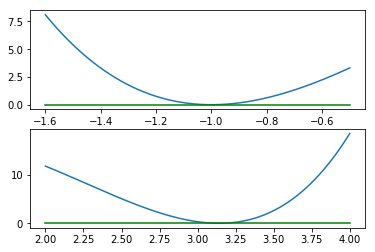

In [3]:
Pi = np.pi
zvals = np.zeros(int(1e3))
xvals1 = np.linspace(-1.6,-.5,int(1e3))
yvals1 = xvals1**4. - 2.*(Pi-1.)*xvals1**3. + (1-4.*Pi+Pi**2.)*xvals1**2. + 2.*Pi*(Pi-1.)*xvals1 + Pi**2.

xvals2 = np.linspace(2.,4.,int(1e3))
yvals2 = xvals2**4. - 2.*(Pi-1.)*xvals2**3. + (1-4.*Pi+Pi**2.)*xvals2**2. + 2.*Pi*(Pi-1.)*xvals2 + Pi**2.

fig, (ax1, ax2) = plt.subplots(2,1,sharex=False,sharey=False)

ax1.plot(xvals1,yvals1)
ax1.plot(xvals1,zvals,color='g')
ax2.plot(xvals2,yvals2)
ax2.plot(xvals2,zvals,color='g')

So, what does it mean for a function to have a degenerate root?  It means, given that $f(x_{\ast})=0$, that for $x$ close to $x_{\ast}$, we have 

$$
f(x) = (x-x_{\ast})^{n}\tilde{f}(x), ~ \tilde{f}(x_{\ast})\neq 0, ~ n>1.
$$

We see then that we have two cases to consider.  The first is $n$ odd.  In this case, the Bisection Method must work since we are guaranteed a sign change in $f$ around the root.  So in this case, my statement about using Bisection was correct.  However, what if $n$ is even?  Then we have some trouble since this is the case in which we have no sign change about the root, and thus we cannot ensure via the criteria of the Bisection Method that a root exists in a given interval. 

So what can we do in this case?  Well, while $f$ may not have a sign change around the root, we are guaranteed that $f'(x)$ will have a sign change around the root.  Thus, we should use the Bisection Method on the derivative of the function.  But when will we decide to do this?  Well, that comes back to our small slope condition

$$
\left|\frac{f(x_{n})-f(x_{n-1})}{x_{n}-x_{n-1}}\right| > tlsw,
$$



In [21]:
def secant_method(x0,x1,f,tolscnt,tolslp):
    f0 = f(x0)
    f1 = f(x1)
    slp = (f1-f0)/(x1-x0)
    print slp
    Flag = True
    if np.abs(slp)<tolslp:
        Flag = False
        return [np.array([x0,x1]),Flag]
    x2 = x1 - f1/slp
    while np.abs(x2-x1)>tolscnt:
        x0 = x1
        x1 = x2
        f0 = f1
        f1 = f(x1)
        print slp
        slp = (f1-f0)/(x1-x0)
        if np.abs(slp)<tolslp:
            Flag = False
            return [np.array([x0,x1]),Flag]
        x2 = x1 - f1/slp
    return [x2,Flag]

In [22]:
def bisec_method(a,b,f,tol):
    fa,fb = f(a),f(b)
    c = (a+b)/2.
    fc = f(c)
    while np.abs(fc)>=tol:
        if fa*fc < 0.:
            b = c
        else:
            a = c
            fa = f(a)
        c = (a+b)/2.
        fc = f(c)
    return c

In [23]:
def sec_bisec_hybrid(x0,x1,f,fp,tolscnt,tolslp,tolbsc):
    sres = secant_method(x0,x1,f,tolscnt,tolslp)
    if sres[1]:
        return sres[0]
    else:
        if sres[0][0] > sres[0][1]:
            a = sres[0][1]
            b = sres[0][0]
        else:
            a = sres[0][0]
            b = sres[0][1]
        fa,fb = f(a),f(b)
        fpa,fpb = fp(a),fp(b)
        if fa*fb<0:
            print "You have a sign change in f"
            xrt = bisec_method(a,b,f,tolbsc)
            return xrt
        elif fpa*fpb<0:
            print "You have a sign change in f'"
            xrt = bisec_method(a,b,fp,tolbsc)
            return xrt
        else:
            #print "Your two guesses are %(1.15f,1.15f)" % (a,b)
            return np.array([a,b])

In [24]:
fa = lambda x: x**4.
fpa = lambda x: 4.*x**3.
sec_bisec_hybrid(-2.99,3.,fa,fpa,1e-12,1e-1,1e-14)

0.179401
0.179401
-89618838.8119
-89618838.6325
108.00014643
73.8282456848
36.0608268983
20.6193822593
11.1542907927
6.16873108248
3.38298982131
1.86131264528
1.02280755644
0.562313397251
0.309087918712
0.169909172457


array([ 0.25656768,  0.31320274])